In [459]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from gplearn.genetic import SymbolicRegressor, SymbolicTransformer
import matplotlib.pyplot as plt

In [460]:
df = pd.read_csv("car_sales_data.csv")

In [461]:
print("First five rows: \n")
df.head()

First five rows: 



,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [462]:
print("Data informations: \n")
df.info()

Data informations: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [463]:
print("Data descriptions: \n")
df.describe()

Data descriptions: 



,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [464]:
df_encoded = pd.get_dummies(df, columns=["Fuel type", "Manufacturer", "Model"], drop_first=True)

X = df_encoded.drop(columns=["Price"])
y = df_encoded["Price"]

X[["Year of manufacture"]] = 2025 - X[["Year of manufacture"]]
X = X.rename(columns={'Year of manufacture': 'Age of car'})

X[["Engine size", "Mileage", "Age of car"]] = (
            (X[["Engine size", "Mileage", "Age of car"]] - X[["Engine size", "Mileage", "Age of car"]].mean()) /
            X[["Engine size", "Mileage", "Age of car"]].std())
y = (y - y.mean()) / y.std()

In [465]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
transformer = SymbolicTransformer(generations=30,
                                  population_size=5000,
                                  hall_of_fame=100,
                                  n_components=10,
                                  function_set=function_set,
                                  parsimony_coefficient=0.0005,
                                  max_samples=0.9,
                                  verbose=1,
                                  random_state=42,
                                  n_jobs=3)

transformer.fit(X, y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    10.58         0.100597       12         0.782857         0.784215      3.86m
   1     9.28         0.384772       17         0.860535         0.853558      5.84m
   2     6.34         0.582697       19         0.931751         0.932663      8.39m
   3     8.51         0.620528       16         0.943368         0.936988      8.41m
   4    14.60         0.695071       22         0.948635         0.952221      9.08m
   5    19.94         0.769648       27         0.952876         0.951325      9.44m
   6    21.86         0.775533       25          0.95877         0.956714      9.55m
   7    20.62         0.759546       31         0.960026         0.962113      8.64m
   8    21.25         0.750252       38         0.966953         0.967868  

SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'abs', 'neg', 'inv', 'max', 'min'],
                    generations=30, max_samples=0.9, n_jobs=3,
                    parsimony_coefficient=0.0005, population_size=5000,
                    random_state=42, verbose=1)

In [466]:
X_transformed = transformer.transform(X)
X = np.hstack((X, X_transformed))
X = pd.DataFrame(X)

In [467]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-1.053058,0.229053,0.206647,False,True,True,False,False,False,False,...,0.525318,1.146759,0.817323,1.146759,1.55396,1.146759,1.509219,1.592159,1.011209,0.607013
1,3.033535,-1.222331,-0.762884,False,True,False,True,False,False,False,...,-24.279866,-19.323887,-25.036856,-19.323887,-19.610079,-20.901049,-27.526253,-28.27588,-26.537172,-25.688702
2,-0.235739,-1.01499,-1.023381,False,False,True,False,False,False,False,...,-5.924158,-5.253942,-5.9765,-4.512167,-5.253942,-5.253942,-7.812051,-6.97223,-7.588114,-7.601869
3,0.0367,1.680437,1.372515,True,False,False,False,True,False,False,...,1.34268,1.546011,0.941762,1.348423,1.883322,1.546011,2.086854,1.448891,1.980642,1.863742
4,-1.053058,-0.185628,0.214591,False,True,False,False,False,True,False,...,0.746872,1.501029,0.949495,1.501029,2.144011,1.501029,2.433349,2.254887,1.406529,0.920695


In [468]:
y.head()

0   -0.655120
1    2.185283
2    0.623944
3   -0.738511
4   -0.592562
Name: Price, dtype: float64

In [469]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [470]:
est_gp = SymbolicRegressor(
    population_size=5000,
    generations=30,
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.1,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    tournament_size=20,
    parsimony_coefficient=0.001,
    stopping_criteria=0.01,
    metric='mse',
    n_jobs=-1,
    random_state=42
)

est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    25.66      1.46003e+28        3         0.338183         0.339127      1.77m
   1     5.99      1.79824e+17        7         0.270834         0.285683      1.24m
   2     3.98      9.52286e+06        7          0.27108          0.28347      1.20m
   3     3.59      1.87224e+07        7         0.227601         0.263684      1.21m
   4     4.14      2.41603e+13        7         0.226478         0.273793      1.16m
   5     6.37          23358.1        7         0.224748         0.289362      1.15m
   6     6.95      3.69372e+06       11         0.221716         0.208779      1.10m
   7     6.99           899813       15         0.189623         0.178251      1.08m
   8     7.15          7617.72       19         0.182846         0.175568  

SymbolicRegressor(generations=30, max_samples=0.9, metric='mse', n_jobs=-1,
                  p_crossover=0.7, p_hoist_mutation=0.1, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, population_size=5000, random_state=42,
                  stopping_criteria=0.01, verbose=1)

In [471]:
y_pred_train = pd.Series(est_gp.predict(X_train), index=X_train.index)
y_pred_train.head()

18306   -0.604479
49528   -0.458195
44745    0.346481
46827    0.847620
27531    0.998321
dtype: float64

In [472]:
y_train.head()

18306   -0.628136
49528   -0.457334
44745    0.530625
46827    0.677183
27531    0.580818
Name: Price, dtype: float64

In [473]:
y_pred_test = pd.Series(est_gp.predict(X_test), index=X_test.index)
y_pred_test.head()

33553    2.927994
9427     1.350062
199      0.127031
12447   -0.557675
39489   -0.502227
dtype: float64

In [474]:
y_test.head()

33553    3.336125
9427     1.306421
199      0.215701
12447   -0.646653
39489   -0.548034
Name: Price, dtype: float64

In [475]:
print("R2 Score of Train Samples: %", est_gp.score(X_train, y_train) * 100)
print("R2 Score of Test Samples: %", est_gp.score(X_test, y_test) * 100)

R2 Score of Train Samples: % 97.02538522126478
R2 Score of Test Samples: % 96.81021019618883


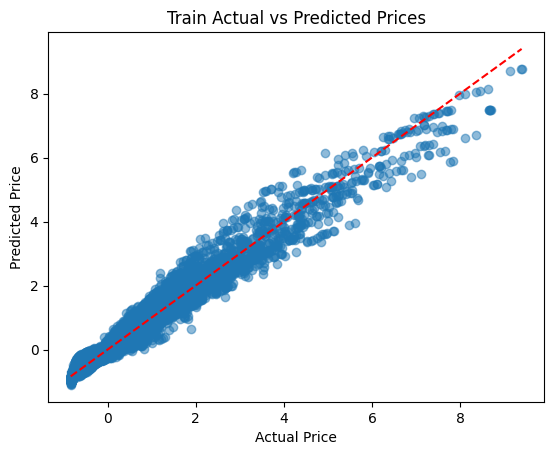

In [476]:
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Train Actual vs Predicted Prices')
plt.show()

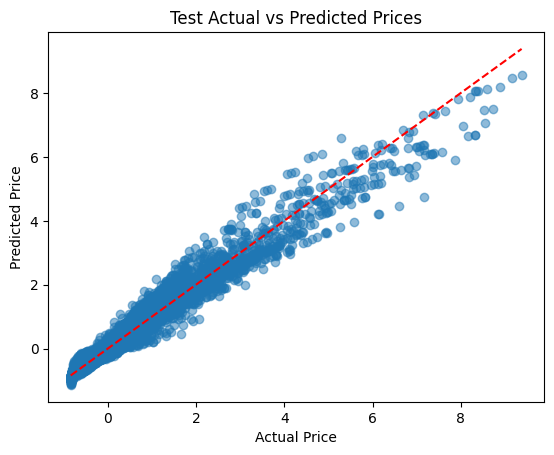

In [477]:
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test Actual vs Predicted Prices')
plt.show()